<a href="https://colab.research.google.com/github/Ajitchan/Deep_learning/blob/main/1_Neural_Network_For_Handwritten_Digits_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [ ]:
# Load the Drive helper and mount your Google Drive as a drive in the virtual machine
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Deep_learning')

In [ ]:
os.getcwd()
os.listdir()

['1 - Neural Network For Handwritten Digits Classification .ipynb']

In [ ]:
import tensorflow as tf 
from tensorflow import  keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() # 'X' is image data and 'y' is truth data which indicate the true value the handwritten image

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[1].ndim

2

In [ ]:
X_train[1]

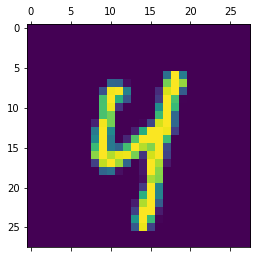

In [ ]:
plt.matshow(X_train[2222])

In [ ]:
y_train[2222]

4

In [ ]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
# Scalling the input features for improving the accuracy
X_train = X_train / 255
X_test = X_test / 255

# Converting 28 * 28 image to single dimension array (reshaping)
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [ ]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [ ]:
X_test_flattened.ndim

2

In [ ]:
X_train_flattened[2]

In [ ]:
model = keras.Sequential([
       keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')           
]) 

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7307 - accuracy: 0.8088
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3127 - accuracy: 0.9128
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2845 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2737 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9251


# Part 2

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 956us/step - loss: 0.2723 - accuracy: 0.9248


[0.27232012152671814, 0.9247999787330627]

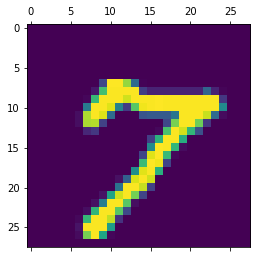

In [ ]:
plt.matshow(X_test[9000])

In [ ]:
y_test[9000]

7

In [ ]:
predict = model.predict(X_test_flattened)
predict[9000]

array([6.6517591e-03, 1.1307620e-07, 1.9535422e-04, 2.5812805e-02,
       1.7908216e-03, 1.8203020e-02, 1.6609764e-07, 9.9995518e-01,
       1.1454818e-01, 9.2406201e-01], dtype=float32)

In [ ]:
np.argmax(predict[9000]) # it will the max value of an array and return its index

7

In [ ]:
y_pred_labels = [np.argmax(i) for i in predict]
y_pred_labels[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [ ]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [ ]:
confu_mat = tf.math.confusion_matrix(labels= y_test , predictions= y_pred_labels)
confu_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1108,    3,    2,    0,    2,    4,    2,   14,    0],
       [   6,    8,  918,   17,    6,    7,   11,   11,   45,    3],
       [   4,    0,   15,  897,    0,   47,    2,   14,   25,    6],
       [   1,    1,    5,    1,  909,    0,   11,    6,   10,   38],
       [   8,    2,    3,   17,    5,  808,   10,    6,   27,    6],
       [  12,    3,    8,    1,    7,   24,  899,    2,    2,    0],
       [   1,    5,   21,    6,    4,    0,    0,  964,    5,   22],
       [   7,    6,    5,   17,    8,   43,    8,   12,  863,    5],
       [  11,    6,    1,    8,   18,   11,    0,   30,    9,  915]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

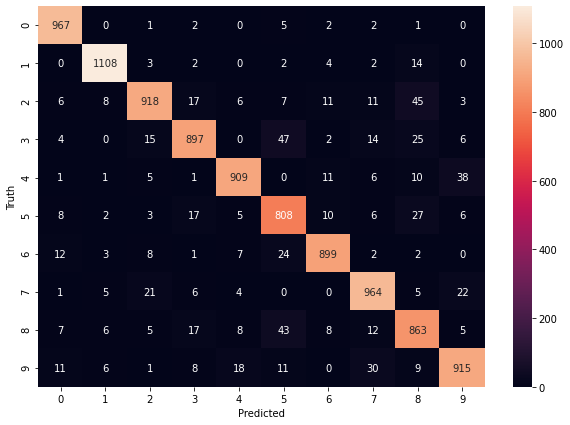

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confu_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Part 3 - Adding hidden layer

In [ ]:
model = keras.Sequential([
       keras.layers.Dense(100, input_shape = (784,), activation='relu'), # 100 neurons in the hidden layer, 'relu' funtion is best for hidden layer
       keras.layers.Dense(10, activation='sigmoid')  # output 10         
]) 

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4472 - accuracy: 0.8725
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1359 - accuracy: 0.9604
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0915 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0636 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0489 - accuracy: 0.9860


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9774


[0.07540019601583481, 0.977400004863739]

Text(69.0, 0.5, 'Truth')

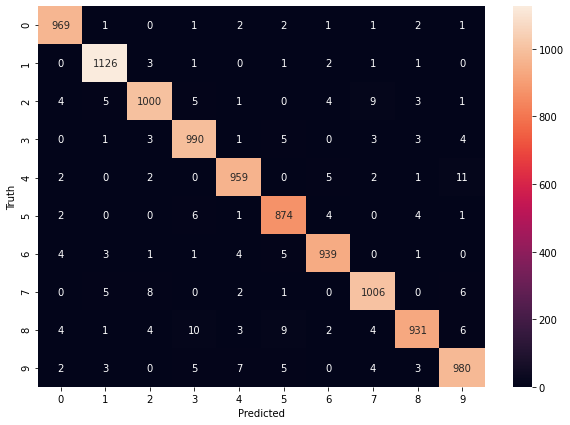

In [ ]:
predict = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in predict]
confu_mat = tf.math.confusion_matrix(labels= y_test , predictions= y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(confu_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Part 4 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Using Flatten layer so that we don't have to call .reshape on input dataset
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4517 - accuracy: 0.8708
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1303 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0634 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0417 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0326 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0272 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0902 - accuracy: 0.9759


[0.0901704728603363, 0.9758999943733215]

# Part 5 - Activation Functions

In [ ]:
import math


def sig(x):
  return 1 / ( 1 + math.exp(-x))

In [ ]:
sig(1)

0.7310585786300049

In [ ]:
def tanh (x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [ ]:
tanh (1)

0.7615941559557649

In [ ]:
tanh (-1)

-0.7615941559557649

In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
relu(-13.4)

0

In [ ]:
relu(13.4)

13.4

In [ ]:
def leaky_relu(x):
  return max(0.1*x,x)

In [ ]:
leaky_relu(13.4)

13.4

In [ ]:
leaky_relu(-13.4)

-1.34

# Part 6 - Dot products (Matrix multiplication)

In [23]:
import numpy as np
revenue = np.array([[180,200,220],[24,36,40],[12,18,20]])
expenses = np.array([[80,90,100],[10,16,20],[8,10,10]])

In [28]:
profit = revenue - expenses
profit

array([[100, 110, 120],
       [ 14,  20,  20],
       [  4,   8,  10]])

In [29]:
price_per_unit = np.array([1000,400,1200])
units = np.array([[30,40,50],[5,10,15],[2,5,7]])

In above case numpy is using broadcasting so it expands price_per_unit array from 1 row, 3 columns to 3 row and 3 columns. Correct way to do matrix multiplication is to use dot product as shown below

In [32]:
np.dot(price_per_unit,units)

array([34400, 50000, 64400])

# Part 7 - Loss or Cost Function

In [33]:
import numpy as np

y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

In [40]:
total_error = 0
for yt, yp in zip(y_true, y_predicted):
   total_error += abs(yt - yp)
   print(total_error)
print("total_error",total_error)  
print("MAE", total_error/ len(y_true))

0.7
1.0
2.0
2.0
2.5
total_error 2.5
MAE 0.5


In [43]:
print("MAE", np.mean(np.abs(y_true - y_predicted)))

MAE 0.5
